w = 
[-2.08248839  1.40266162]
[[-1510.16779642  1885.90951517]]
is my result equal to standard:
0.02
is my result equal to expected:
0.5075
is standard result equal to expected:
0.5125
[  11.  -93.   98. -184. -101.   64. -186.  147.  -61.  119.  -82. -155.
 -126.   83. -185. -188.  -69. -116.  -78.   77. -157.  143.  140.   45.
  -29.  -43.  118.  -49.  162.  147.    5.   41.   85.  128.  -32.  150.
  170.  121. -111. -183.    4.  -82.  -18.  138.  153.   65. -111. -148.
 -102.  -26.  -94. -138.  151.   -8.   13.   11. -179.   13.  184.   22.
  -54.  131.  -93.   -7. -178.  136.  -19.  -42.  112.   18.  188.  100.
 -131.   82.   29.   -4.  -89.  190.  168.  158.  -76. -113.   -2.   67.
 -147.    1.  111.  138.   -1. -170.  -82.   -6.    2. -172.  155.   77.
   27.   40.  154. -125.  -98.  -45. -182.   10.  -35.  -75.   35.  -48.
 -132.  175.    7.  -87. -198.  -75. -143.  -36.  197.  -63. -116.  -92.
 -158.  146.   45.  125. -169.   29.  114. -112.   99.  -64.   91.   87.
   67.  179

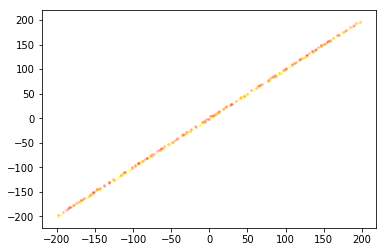

In [93]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return x + 1

def f2(x):
    return x - 1


#generating input data
k = 1000
bound = 200

noise1 = np.random.normal(size = k, scale = 0.95)        
noise2 = np.random.normal(size = k, scale = 0.95)        
x1 = np.random.randint(-1 * bound, bound, k)
y1 = f1(x1) + noise1
x2 = np.random.randint(-1 * bound, bound, k)
y2 = f2(x2) + noise2

x = []
y = []
for i in range(0, k):
    x.append([x1[i], y1[i]])
    y.append(1)
    x.append([x2[i], y2[i]])
    y.append(-1)

    
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


def grad(x, y):
    return -1. * y * x

from numpy import linalg as la
from random import randint

class DClassifier(object):
    """docstring"""
 
    def __init__(self):
        """Constructor"""
        self.eps = 0.001
        self.iter = 1
        #pass
    
    def fit(self, x_arr, y_arr):
        self.iter = 1
        x = np.array(x_arr)
        x = x.reshape(x.shape[0], -1)
        l = x.shape[0]
        #x_expanded = np.hstack((x, np.ones((l, 1))))
        d = x.shape[1]
        y = np.array(y_arr)
        self.w = np.zeros(d)
        c = 1.
    
        while True:
            bad_indices = []
            for i in range (0, l):
                if y[i] * np.dot(x[i], self.w) < 1:
                    bad_indices.append(i)
            if len(bad_indices) == 0:
                break
            if len(bad_indices) == 1:
                index = 0
            else:
                index = randint(0, len(bad_indices) - 1)
            g = grad(x[bad_indices[index]], y[bad_indices[index]])
            tmp = g * (1. / self.iter)
            prev = self.w
            self.w = self.w - tmp
            if (la.norm(self.w - prev) <= self.eps):
                break
            self.iter += 1
        print 'w = '
        print self.w

    def get_iter_count():
        return self.iter
        
    def predict(self, x_arr):
        arr = []
        #x_expanded = np.hstack((x_arr, np.ones((len(x_arr), 1))))
        for i in range(0, len(x_arr)):
            if (np.dot(x_arr[i], self.w) >= 0):
                arr.append(1)
            else:
                arr.append(-1)
        return arr
    
    def f(x):
        return -1. * w[0] * x[0] / w2
    
    def graph2D(self, x, y):
        x = np.array(x)
        #print x[:, 0]
        x1 = np.array([])
        y1 = np.array([])
        x2 = np.array([])
        y2 = np.array([])
        for i in range (0, len(x)):
            if y[i] == 1:
                #print (x[i][0], ' ', x[i][1])
                x1 = np.append(x1, x[i][0])
                y1 = np.append(y1, x[i][1])
            if y[i] == -1:
                x2 = np.append(x2, x[i][0])
                y2 = np.append(y2, x[i][1])
        print x1
        print y1
        plt.scatter(x1, y1, c = 'red', s = 3, alpha = 0.2)
        plt.scatter(x2, y2, c = 'yellow', s = 3, alpha = 0.2)
        plt.show()       
        

clf1 = DClassifier()
clf1.fit(x_train, y_train)
test1 = clf1.predict(x_test)

from sklearn import linear_model
clf2 = linear_model.SGDClassifier()
clf2.fit(x_train, y_train)
test2 = clf2.predict(x_test)
print clf2.coef_
compare = np.array(test1) == np.array(test2)
right = 1. / len(x_test) * np.sum(compare)
print 'is my result equal to standard:'
print right
compare = np.array(test1) == np.array(y_test)
right = 1. / len(x_test) * np.sum(compare)
print 'is my result equal to expected:'
print right
compare = np.array(y_test) == np.array(test2)
right = 1. / len(x_test) * np.sum(compare)
print 'is standard result equal to expected:'
print right

clf1.graph2D(x_test, y_test)


In [14]:
#шум добавлять ко второй координате?
#batch = 1 всегда?
#плоскость ~ z = -x + y ?
#ничего, что через циклы, а не через модный синтаксис питона?
#"Нарисуйте разделяющую прямую и точки с их метками". Это же плоскость?